In [1]:
import sys
import os

thesis_path = "/" + os.path.join(
    *os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)


In [2]:
from evaluations.content_02 import get_per_sample_metrics

metrics_df = get_per_sample_metrics()

/home/loebbert/miniconda3/envs/haystack/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130766400 entries, 0 to 130766399
Data columns (total 18 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   seed            int64 
 1   checkpoint      object
 2   gazetteer_size  int64 
 3   error_ratio     int64 
 4   error_part      object
 5   timestep        int64 
 6   dataset         object
 7   doc_id          object
 8   targets         int64 
 9   entity_type     object
 10  tp              int64 
 11  fn              int64 
 12  fp              int64 
 13  error_type1     int64 
 14  error_type2     int64 
 15  error_type3     int64 
 16  error_type4     int64 
 17  error_type5     int64 
dtypes: int64(13), object(5)
memory usage: 17.5+ GB


## Performance table 1

Rows: Dimensions:  "gazetteer_size", "error_ratio", "error_part"
Columns: Timestep:

In [4]:
from evaluations.content_02 import aggregate_performance_metrics

agg_df = aggregate_performance_metrics(metrics_df).reset_index()
agg_df = agg_df[agg_df["dataset"]=="lowner_test"]
agg_df

,seed,gazetteer_size,error_ratio,error_part,timestep,dataset,fn,fp,tp,precision,recall,f1
1,1,2000,0,both,0,lowner_test,6805,5412,36911,87.212627,84.433617,85.800625
4,1,2000,0,both,1,lowner_test,6805,5412,36911,87.212627,84.433617,85.800625
7,1,2000,0,both,2,lowner_test,5826,4898,37890,88.552865,86.673072,87.602885
10,1,2000,0,gazetteer,0,lowner_test,6805,5412,36911,87.212627,84.433617,85.800625
13,1,2000,0,gazetteer,1,lowner_test,6805,5412,36911,87.212627,84.433617,85.800625
...,...,...,...,...,...,...,...,...,...,...,...,...
1282,3,8000,15,gazetteer,1,lowner_test,6626,4930,37090,88.267492,84.843078,86.521415
1285,3,8000,15,gazetteer,2,lowner_test,5762,4435,37954,89.537380,86.819471,88.157482
1288,3,8000,15,train,0,lowner_test,8050,4772,35666,88.199219,81.585689,84.763648
1291,3,8000,15,train,1,lowner_test,8050,4772,35666,88.199219,81.585689,84.763648


In [5]:
from evaluations.utils import merge_mean_std, LATEX_METRIC_NAMES
size_agg_df = agg_df.pivot_table(values=["f1", "precision", "recall"],
                                 index=["timestep", "gazetteer_size"],
                                 aggfunc=["mean", "std"]).swaplevel(
                                     0, 1, axis=1).sort_index(axis=1)

metric_names = ["f1", "precision", "recall"]

new_columns = []
for metric_col in metric_names:
    column = (LATEX_METRIC_NAMES[metric_col],
                    "")
    new_columns.append(column)
    size_agg_df[column] = merge_mean_std(size_agg_df,
                                        (metric_col, "mean"),
                                        (metric_col, "std"))
size_agg_df["Dimension"] = "Gazetteer size"
size_agg_df.reset_index(inplace=True)
size_agg_df.set_index(["timestep", "Dimension", "gazetteer_size"], inplace=True)
size_agg_df[new_columns]

Micro-F1   Precision       Recall
                                                                            
timestep Dimension      gazetteer_size                                      
0        Gazetteer size 2000            85.05 (108)  87.60 (23)  82.68 (200)
                        4000            85.26 (155)  87.84 (18)  82.86 (279)
                        6000            85.64 (113)  87.98 (25)  83.43 (200)
                        8000             85.83 (89)  88.14 (21)  83.65 (162)
1        Gazetteer size 2000            85.07 (108)  87.61 (22)  82.69 (199)
                        4000            85.27 (153)  87.86 (19)  82.88 (277)
                        6000            85.66 (113)  88.00 (25)  83.46 (201)
                        8000             85.86 (88)  88.18 (21)  83.68 (160)
2        Gazetteer size 2000            86.77 (109)  88.90 (25)  84.76 (208)
                        4000            87.03 (154)  89.19 (18)  85.03 (282)
                        6000            87.46 (114)  89.35 (25)  85.67 (207)
                        8000             87.65 (91)  89.51 (23)  85.87 (164)

In [6]:
ratio_agg_df = agg_df.pivot_table(values=["f1", "precision", "recall"],
                                  index=["timestep", "error_ratio"],
                                  aggfunc=["mean", "std"]).swaplevel(
                                      0, 1, axis=1).sort_index(axis=1)
timesteps = [0, 1, 2]
metric_names = ["f1", "precision", "recall"]

new_columns = []
for metric_col in metric_names:
    column = (LATEX_METRIC_NAMES[metric_col], "")
    new_columns.append(column)
    ratio_agg_df[column] = merge_mean_std(ratio_agg_df,
                                            (metric_col, "mean"),
                                            (metric_col, "std"))
ratio_agg_df["Dimension"] = "Error ratio"
ratio_agg_df.reset_index(inplace=True)
ratio_agg_df.set_index(["timestep", "Dimension", "error_ratio"], inplace=True)
ratio_agg_df[new_columns]

Micro-F1   Precision       Recall
                                                                      
timestep Dimension   error_ratio                                      
0        Error ratio 0             86.25 (27)  87.94 (33)   84.62 (31)
                     5             85.69 (84)  87.91 (26)  83.60 (148)
                     10            85.38 (67)  87.90 (29)  83.01 (117)
                     15           84.45 (174)  87.82 (29)  81.39 (313)
1        Error ratio 0             86.25 (27)  87.94 (33)   84.62 (31)
                     5             85.70 (84)  87.92 (27)  83.61 (147)
                     10            85.41 (68)  87.92 (29)  83.04 (118)
                     15           84.50 (175)  87.87 (31)  81.44 (313)
2        Error ratio 0             88.05 (32)  89.29 (34)   86.85 (39)
                     5             87.48 (84)  89.24 (31)  85.80 (149)
                     10            87.16 (68)  89.27 (32)  85.16 (120)
                     15           86.22 (176)  89.16 (31)  83.52 (320)

In [7]:
part_agg_df = agg_df.pivot_table(values=["f1", "precision", "recall"],
                                 index=["timestep", "error_part"],
                                 aggfunc=["mean", "std"]).swaplevel(
                                     0, 1, axis=1).sort_index(axis=1)
metric_names = ["f1", "precision", "recall"]

new_columns = []
for metric_col in metric_names:
    column = (LATEX_METRIC_NAMES[metric_col], "")
    new_columns.append(column)
    part_agg_df[column] = merge_mean_std(part_agg_df,
                                            (metric_col, "mean"),
                                            (metric_col, "std"))
part_agg_df["Dimension"] = "Error part"
part_agg_df.reset_index(inplace=True)
part_agg_df.set_index(["timestep", "Dimension", "error_part"], inplace=True)
part_agg_df[new_columns]

Micro-F1   Precision       Recall
                                                                    
timestep Dimension  error_part                                      
0        Error part both        85.08 (126)  87.86 (29)  82.50 (224)
                    gazetteer    86.20 (30)  87.93 (30)   84.53 (38)
                    train       85.05 (139)  87.88 (29)  82.43 (248)
1        Error part both        85.12 (124)  87.89 (30)  82.54 (221)
                    gazetteer    86.23 (31)  87.97 (31)   84.56 (39)
                    train       85.05 (139)  87.88 (29)  82.43 (248)
2        Error part both        86.86 (127)  89.20 (33)  84.67 (228)
                    gazetteer    87.98 (33)  89.29 (33)   86.72 (42)
                    train       86.84 (142)  89.23 (31)  84.62 (258)

In [8]:
import pandas as pd

perf_df = pd.concat([
    size_agg_df[new_columns], ratio_agg_df[new_columns],
    part_agg_df[new_columns]
])
perf_df.sort_index(inplace=True)


In [9]:
perf_df.index.rename(["Timestep", "Dimension", "Value"], inplace=True)
perf_df.columns.rename(["Metric", None], inplace=True)
print(perf_df.style.to_latex(
    siunitx=True,
    hrules=True,
    multirow_align="t",
    column_format=
    "@{}lll*3{S[table-format = 2.2 (2)]}@{} "
))


\begin{tabular}{@{}lll*3{S[table-format = 2.2 (2)]}@{}}
\toprule
{} & {} & {Metric} & {Micro-F1} & {Precision} & {Recall} \\
{} & {} & {} & {} & {} & {} \\
{Timestep} & {Dimension} & {Value} & {} & {} & {} \\
\midrule
\multirow[t]{11}{*}{0} & \multirow[t]{3}{*}{Error part} & both & 85.08 (126) & 87.86 (29) & 82.50 (224) \\
 &  & gazetteer & 86.20 (30) & 87.93 (30) & 84.53 (38) \\
 &  & train & 85.05 (139) & 87.88 (29) & 82.43 (248) \\
 & \multirow[t]{4}{*}{Error ratio} & 0 & 86.25 (27) & 87.94 (33) & 84.62 (31) \\
 &  & 5 & 85.69 (84) & 87.91 (26) & 83.60 (148) \\
 &  & 10 & 85.38 (67) & 87.90 (29) & 83.01 (117) \\
 &  & 15 & 84.45 (174) & 87.82 (29) & 81.39 (313) \\
 & \multirow[t]{4}{*}{Gazetteer size} & 2000 & 85.05 (108) & 87.60 (23) & 82.68 (200) \\
 &  & 4000 & 85.26 (155) & 87.84 (18) & 82.86 (279) \\
 &  & 6000 & 85.64 (113) & 87.98 (25) & 83.43 (200) \\
 &  & 8000 & 85.83 (89) & 88.14 (21) & 83.65 (162) \\
\multirow[t]{11}{*}{1} & \multirow[t]{3}{*}{Error part} & both & 85.12 

## Performance per entity type

In [8]:
agg_df = metrics_df.pivot_table(index=[
    "seed", "gazetteer_size", "error_ratio", "error_part", "timestep",
    "dataset", "entity_type"
],
                                values=["tp", "fp", "fn"],
                                aggfunc="sum").reset_index()
agg_df["precision"] = 100 * agg_df["tp"] / (agg_df["tp"] + agg_df["fp"])
agg_df["recall"] = 100 * agg_df["tp"] / (agg_df["tp"] + agg_df["fn"])
agg_df["f1"] = 2 * agg_df["precision"] * agg_df["recall"] / (
    agg_df["precision"] + agg_df["recall"])

In [14]:
agg_df

,seed,gazetteer_size,error_ratio,error_part,timestep,dataset,entity_type,fn,fp,tp,precision,recall,f1
0,1,2000,0,both,0,lowner_dev,corporation,54,45,123,73.214286,69.491525,71.304348
1,1,2000,0,both,0,lowner_dev,creative-work,162,127,353,73.541667,68.543689,70.954774
2,1,2000,0,both,0,lowner_dev,group,136,109,499,82.072368,78.582677,80.289622
3,1,2000,0,both,0,lowner_dev,location,224,173,1401,89.008895,86.215385,87.589872
4,1,2000,0,both,0,lowner_dev,person,50,71,1232,94.551036,96.099844,95.319149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,3,8000,15,train,2,lowner_train,creative-work,378,118,1582,93.058824,80.714286,86.448087
7772,3,8000,15,train,2,lowner_train,group,298,144,2227,93.926613,88.198020,90.972222
7773,3,8000,15,train,2,lowner_train,location,653,193,5543,96.635286,89.460943,92.909822
7774,3,8000,15,train,2,lowner_train,person,435,145,4977,97.169075,91.962306,94.494019


In [18]:
import pandas as pd
from evaluations.utils import LATEX_METRIC_NAMES, merge_mean_std, ENTITY_NAMES
dimensions = ["gazetteer_size", "error_ratio", "error_part"]
dimension_name = {
    "gazetteer_size": "Gazetteer size",
    "error_ratio": "Error ratio",
    "error_part": "Error part"
}
dim_dfs = []
for dimension in dimensions:
    dim_agg_df = agg_df[agg_df["dataset"]=="lowner_test"].pivot_table(
        index=[
            "timestep", dimension
        ],
        columns=["entity_type"],
        values="f1",
        aggfunc=["mean", "std"]).swaplevel(axis=1, i=1,
                                        j=0).sort_index(axis=1)
    new_columns = []
    for metric_col in ENTITY_NAMES:
        column = (ENTITY_NAMES[metric_col], "")
        new_columns.append(column)
        dim_agg_df[column] = merge_mean_std(dim_agg_df, (metric_col, "mean"),
                                            (metric_col, "std"), 2)
    dim_agg_df["Dimension"] = dimension_name[dimension]
    dim_agg_df.reset_index(inplace=True)
    dim_agg_df.set_index(["timestep", "Dimension", dimension], inplace=True)
    dim_dfs.append(dim_agg_df[new_columns])
tmp_table = pd.concat(dim_dfs).sort_index()
tmp_table.index.rename(["Timestep", "Dimension", "Value"], inplace=True)
tmp_table.columns.rename(["Metric", None], inplace=True)
tmp_table.sort_index(inplace=True)
print(
    tmp_table.style.to_latex(
        siunitx=True,
        hrules=True,
        multirow_align="t",
        column_format="@{}lll*6{S[table-format = 2.2 (2)]}@{} "))

\begin{tabular}{@{}lll*6{S[table-format = 2.2 (2)]}@{}}
\toprule
{} & {} & {Metric} & {Person} & {Location} & {Group} & {Corporation} & {Creative Work} & {Product} \\
{} & {} & {} & {} & {} & {} & {} & {} & {} \\
{Timestep} & {Dimension} & {Value} & {} & {} & {} & {} & {} & {} \\
\midrule
\multirow[t]{11}{*}{0} & \multirow[t]{3}{*}{Error part} & both & 93.32 (225) & 87.15 (73) & 80.92 (115) & 76.82 (191) & 71.14 (194) & 44.77 (412) \\
 &  & gazetteer & 94.43 (15) & 88.01 (22) & 81.92 (64) & 78.45 (91) & 72.96 (69) & 48.97 (218) \\
 &  & train & 93.24 (241) & 87.10 (79) & 80.96 (120) & 76.74 (206) & 71.17 (228) & 45.12 (428) \\
 & \multirow[t]{4}{*}{Error ratio} & 0 & 94.42 (13) & 88.00 (24) & 82.10 (59) & 78.61 (94) & 73.10 (62) & 49.38 (211) \\
 &  & 5 & 93.87 (172) & 87.66 (31) & 81.44 (74) & 77.82 (114) & 72.12 (131) & 47.24 (252) \\
 &  & 10 & 93.86 (45) & 87.24 (63) & 81.14 (89) & 77.20 (147) & 71.60 (135) & 44.96 (362) \\
 &  & 15 & 92.51 (326) & 86.78 (95) & 80.38 (138) & 75.71 

## Second Performance table
1. (Data part = Both)
2. Timestep = 3
3. index = Data part, Error rate
4. columns = size
values = f1

In [10]:
from evaluations.content_02 import aggregate_performance_metrics

agg_df = aggregate_performance_metrics(metrics_df).reset_index()
agg_df = agg_df[agg_df["dataset"] == "lowner_test"]
agg_df

,seed,gazetteer_size,error_ratio,error_part,timestep,dataset,fn,fp,tp,precision,recall,f1
1,1,2000,0,both,0,lowner_test,6805,5412,36911,87.212627,84.433617,85.800625
4,1,2000,0,both,1,lowner_test,6805,5412,36911,87.212627,84.433617,85.800625
7,1,2000,0,both,2,lowner_test,5826,4898,37890,88.552865,86.673072,87.602885
10,1,2000,0,gazetteer,0,lowner_test,6805,5412,36911,87.212627,84.433617,85.800625
13,1,2000,0,gazetteer,1,lowner_test,6805,5412,36911,87.212627,84.433617,85.800625
...,...,...,...,...,...,...,...,...,...,...,...,...
1282,3,8000,15,gazetteer,1,lowner_test,6626,4930,37090,88.267492,84.843078,86.521415
1285,3,8000,15,gazetteer,2,lowner_test,5762,4435,37954,89.537380,86.819471,88.157482
1288,3,8000,15,train,0,lowner_test,8050,4772,35666,88.199219,81.585689,84.763648
1291,3,8000,15,train,1,lowner_test,8050,4772,35666,88.199219,81.585689,84.763648


In [11]:
from evaluations.utils import merge_mean_std

perf_df = agg_df.pivot_table(
    values="f1",
    index=["timestep", "gazetteer_size", "error_part"],
    columns="error_ratio",
    aggfunc=["mean",
             "std"]).swaplevel(0, 1,
                               axis=1).sort_index(axis=1).sort_index(axis=0)

ratios = [0, 5, 10, 15]
new_columns = []
for ratio in ratios:
    column = (ratio, "")
    new_columns.append(column)
    perf_df[column] = merge_mean_std(perf_df, (ratio, "mean"), (ratio, "std"))

perf_df = perf_df[new_columns]
perf_df.index.rename(["Timestep", "Gazetteer size", "Error part"], inplace=True)
perf_df.columns.rename(["Error ratio", None], inplace=True)
perf_df.sort_index(inplace=True)
print(
    perf_df.style.to_latex(
        siunitx=True,
        hrules=True,
        multirow_align="t",
        column_format="@{}ll*4{S[table-format = 2.2 (2)]}@{} "))


\begin{tabular}{@{}ll*4{S[table-format = 2.2 (2)]}@{}}
\toprule
{} & {} & {Error ratio} & {0} & {5} & {10} & {15} \\
{} & {} & {} & {} & {} & {} & {} \\
{Timestep} & {Gazetteer size} & {Error part} & {} & {} & {} & {} \\
\midrule
\multirow[t]{12}{*}{0} & \multirow[t]{3}{*}{2000} & both & 85.86 (5) & 83.98 (232) & 84.59 (13) & 83.93 (28) \\
 &  & gazetteer & 85.86 (5) & 85.77 (21) & 85.92 (8) & 85.76 (23) \\
 &  & train & 85.86 (5) & 85.29 (19) & 84.46 (12) & 83.35 (55) \\
 & \multirow[t]{3}{*}{4000} & both & 86.24 (10) & 85.54 (31) & 85.02 (15) & 82.66 (228) \\
 &  & gazetteer & 86.24 (10) & 86.11 (11) & 85.91 (19) & 86.24 (3) \\
 &  & train & 86.24 (10) & 85.69 (2) & 84.70 (25) & 82.47 (245) \\
 & \multirow[t]{3}{*}{6000} & both & 86.40 (9) & 85.69 (30) & 85.08 (9) & 84.40 (21) \\
 &  & gazetteer & 86.40 (9) & 86.22 (9) & 86.42 (12) & 86.30 (11) \\
 &  & train & 86.40 (9) & 85.83 (12) & 85.22 (13) & 83.26 (239) \\
 & \multirow[t]{3}{*}{8000} & both & 86.49 (26) & 85.86 (40) & 85.37 (5

# Collect data metrics

## Collect gazetteer data

In [1]:
import sys
import os

thesis_path = "/" + os.path.join(*os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)


In [2]:
from evaluations.content_02 import get_search_results_entity_coverage_per_sample

eecr_search_results = get_search_results_entity_coverage_per_sample()

/home/loebbert/miniconda3/envs/haystack/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
eecr_search_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21794400 entries, 0 to 21794399
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   seed            int64  
 1   gazetteer_size  int64  
 2   error_ratio     int64  
 3   error_part      object 
 4   timestep        int64  
 5   dataset         object 
 6   doc_id          object 
 7   targets         int64  
 8   eecr            float64
 9   ρ=1             int64  
 10  ρ ∈ (0.5,1)     int64  
 11  ρ ∈ (0,0.5]     int64  
 12  ρ=0∧C≠0         int64  
 13  ρ=0∧C=0         int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 2.3+ GB


In [4]:
from evaluations.content_02 import get_search_results_data_ccr_metrics

ccr_search_results = get_search_results_data_ccr_metrics()

In [5]:
ccr_search_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21794400 entries, 0 to 21794399
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   seed            int64  
 1   gazetteer_size  int64  
 2   error_ratio     int64  
 3   error_part      object 
 4   timestep        int64  
 5   dataset         object 
 6   doc_id          object 
 7   total entities  int64  
 8   search score    float64
 9   max             float64
 10  φ ∈ (0.5,1]     int64  
 11  φ ∈ (0,0.5]     int64  
 12  φ ∈ (-0.5,0]    int64  
 13  φ ∈ [-1,-0.5]   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 2.3+ GB


## EECR table

In [6]:
import sys
import os

thesis_path = "/" + os.path.join(*os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)

In [7]:
from evaluations.content_02 import get_labeled_data_entity_coverage, get_labeled_data_entity_coverage_per_sample, get_search_results_entity_coverage_per_sample

eecr_labeled_data_df = get_labeled_data_entity_coverage()
eecr_labeled_data_per_sample_df = get_labeled_data_entity_coverage_per_sample()
eecr_search_results_per_sample_df = get_search_results_entity_coverage_per_sample()

In [8]:
eecr_labeled_data_df = eecr_labeled_data_df[eecr_labeled_data_df["dataset"] ==
                                            "lowner_test"]
eecr_labeled_data_per_sample_df = eecr_labeled_data_per_sample_df[
    eecr_labeled_data_per_sample_df["dataset"] == "lowner_test"]
eecr_search_results_per_sample_df = eecr_search_results_per_sample_df[
    eecr_search_results_per_sample_df["dataset"] == "lowner_test"]


In [9]:
from evaluations.emerging_03 import get_per_sample_metrics

metrics_df = get_per_sample_metrics()
from typing import List
dimensions = ["gazetteer_size", "error_ratio", "error_part"]
dimension_name = {
    "gazetteer_size": "Gazetteer size",
    "error_ratio": "Error ratio", "error_part": "Error part"
}
metric_columns = [
    "eecr_labeled_data", "eecr_labeled_data_per_sample", "eecr_search_results"
]
eecr_labeled_data_df.rename({"eecr": "eecr_labeled_data"},
                            axis=1,
                            inplace=True)
eecr_labeled_data_per_sample_df.rename({"eecr": "eecr_labeled_data_per_sample"},
                            axis=1,
                            inplace=True)
eecr_search_results_per_sample_df.rename({"eecr": "eecr_search_results"},
                            axis=1,
                            inplace=True)



dfs = [
    eecr_labeled_data_df, eecr_labeled_data_per_sample_df,
    eecr_search_results_per_sample_df
]

eecr_table_columns: List[pd.DataFrame] = []

for df in dfs:
    filtered_metric_columns = [met_col for met_col in metric_columns if met_col in df.columns.tolist()]
    dim_dfs = []
    for dimension in dimensions:
        dim_agg_df = df.pivot_table(values=filtered_metric_columns,
                                        index=["timestep", dimension],
                                        aggfunc=["mean", "std"]).swaplevel(
                                            0, 1, axis=1).sort_index(axis=1)

        new_columns = []
        for metric_col in filtered_metric_columns:
            column = (LATEX_METRIC_NAMES[metric_col], "")
            new_columns.append(column)
            dim_agg_df[column] = merge_mean_std(dim_agg_df, (metric_col, "mean"),
                                                (metric_col, "std"), 4)
        dim_agg_df["Dimension"] = dimension_name[dimension]
        dim_agg_df.reset_index(inplace=True)
        dim_agg_df.set_index(["timestep", "Dimension", dimension],
                            inplace=True)
        dim_dfs.append(dim_agg_df[new_columns])
    tmp_table = pd.concat(dim_dfs).sort_index()
    tmp_table.index.rename(["Timestep", "Dimension", "Value"], inplace=True)
    tmp_table.columns.rename(["Metric", None], inplace=True)
    eecr_table_columns.append(tmp_table)


print(eecr_table_columns[0].join(eecr_table_columns[1:]).style.to_latex(
    siunitx=True,
    hrules=True,
    multirow_align="t",
    column_format="@{}lll*3{S[table-format = 2.2 (2)]}@{} "))


\begin{tabular}{@{}lll*3{S[table-format = 2.2 (2)]}@{}}
\toprule
{} & {} & {Metric} & {EECR labeled data} & {EECR labeled data per sample} & {EECR search results} \\
{} & {} & {} & {} & {} & {} \\
{Timestep} & {Dimension} & {Value} & {} & {} & {} \\
\midrule
\multirow[t]{11}{*}{0} & \multirow[t]{3}{*}{Error part} & both & 0.2780 (536) & 0.2248 (3694) & 0.1670 (3338) \\
 &  & gazetteer & 0.2780 (536) & 0.2248 (3694) & 0.1670 (3338) \\
 &  & train & 0.2821 (541) & 0.2282 (3720) & 0.1715 (3376) \\
 & \multirow[t]{4}{*}{Error ratio} & 0 & 0.2815 (551) & 0.2278 (3719) & 0.1715 (3375) \\
 &  & 5 & 0.2807 (540) & 0.2272 (3712) & 0.1696 (3362) \\
 &  & 10 & 0.2799 (529) & 0.2260 (3702) & 0.1677 (3343) \\
 &  & 15 & 0.2754 (538) & 0.2228 (3678) & 0.1653 (3321) \\
 & \multirow[t]{4}{*}{Gazetteer size} & 2000 & 0.1998 (47) & 0.1610 (3219) & 0.1219 (2911) \\
 &  & 4000 & 0.2670 (31) & 0.2156 (3630) & 0.1607 (3280) \\
 &  & 6000 & 0.3086 (48) & 0.2498 (3836) & 0.1859 (3483) \\
 &  & 8000 & 0.3420 (

## CCR table

In [10]:
import sys
import os

thesis_path = "/" + os.path.join(*os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)

In [11]:
from evaluations.content_02 import get_search_results_data_ccr_metrics

search_results_ccr = get_search_results_data_ccr_metrics()
search_results_ccr.columns

Index(['seed', 'gazetteer_size', 'error_ratio', 'error_part', 'timestep',
       'dataset', 'doc_id', 'total entities', 'search score', 'max',
       'φ ∈ (0.5,1]', 'φ ∈ (0,0.5]', 'φ ∈ (-0.5,0]', 'φ ∈ [-1,-0.5]'],
      dtype='object')

In [12]:
from evaluations.utils import LATEX_METRIC_NAMES, merge_mean_std
import pandas as pd
from typing import List

dimensions = ["gazetteer_size", "error_ratio", "error_part"]
dimension_name = {
    "gazetteer_size": "Gazetteer size",
    "error_ratio": "Error ratio",
    "error_part": "Error part"
}
metric_columns = [
    "max", "search score", "total entities"
]

df = search_results_ccr[search_results_ccr["dataset"]=="lowner_test"]

filtered_metric_columns = [
    met_col for met_col in metric_columns
    if met_col in df.columns.tolist()
]
dim_dfs = []
for dimension in dimensions:
    dim_agg_df = df.pivot_table(values=filtered_metric_columns,
                                index=["timestep", dimension],
                                aggfunc=["mean", "std"]).swaplevel(
                                    0, 1, axis=1).sort_index(axis=1)

    new_columns = []
    for metric_col in filtered_metric_columns:
        column = (LATEX_METRIC_NAMES[metric_col], "")
        new_columns.append(column)
        dim_agg_df[column] = merge_mean_std(dim_agg_df,
                                            (metric_col, "mean"),
                                            (metric_col, "std"), 4)
    dim_agg_df["Dimension"] = dimension_name[dimension]
    dim_agg_df.reset_index(inplace=True)
    dim_agg_df.set_index(["timestep", "Dimension", dimension],
                            inplace=True)
    dim_dfs.append(dim_agg_df[new_columns])
tmp_table = pd.concat(dim_dfs).sort_index()
tmp_table.index.rename(["Timestep", "Dimension", "Value"], inplace=True)
tmp_table.columns.rename(["Metric", None], inplace=True)
tmp_table.sort_index(inplace=True)

print(
    tmp_table.style.to_latex(
        siunitx=True,
        hrules=True,
        multirow_align="t",
        column_format="@{}lll*3{S[table-format = 2.2 (2)]}@{} "))


\begin{tabular}{@{}lll*3{S[table-format = 2.2 (2)]}@{}}
\toprule
{} & {} & {Metric} & {Top-1 Cosine Similarity} & {Search score} & {Retrieved entities} \\
{} & {} & {} & {} & {} & {} \\
{Timestep} & {Dimension} & {Value} & {} & {} & {} \\
\midrule
\multirow[t]{11}{*}{0} & \multirow[t]{3}{*}{Error part} & both & 0.5498 (1139) & 4.0953 (18054) & 10.2549 (24091) \\
 &  & gazetteer & 0.5498 (1139) & 4.0953 (18054) & 10.2549 (24091) \\
 &  & train & 0.5508 (1140) & 4.0599 (18371) & 10.1525 (24511) \\
 & \multirow[t]{4}{*}{Error ratio} & 0 & 0.5508 (1140) & 4.0720 (18597) & 10.1661 (24769) \\
 &  & 5 & 0.5505 (1143) & 4.0681 (18071) & 10.1810 (24073) \\
 &  & 10 & 0.5498 (1139) & 4.0750 (17997) & 10.2241 (23967) \\
 &  & 15 & 0.5492 (1137) & 4.1191 (17967) & 10.3118 (24104) \\
 & \multirow[t]{4}{*}{Gazetteer size} & 2000 & 0.5214 (1096) & 3.8237 (16646) & 10.2331 (23280) \\
 &  & 4000 & 0.5466 (1123) & 4.0566 (17919) & 10.2263 (24041) \\
 &  & 6000 & 0.5612 (1135) & 4.1828 (18410) & 10.2106 

## Correlation table

Perf metrics: Precision, Recall, F1 + Input Entity count

In [1]:
import sys
import os

thesis_path = "/" + os.path.join(*os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)

In [2]:
from evaluations.content_02 import get_per_sample_metrics, get_search_results_data_ccr_metrics, get_labeled_data_entity_coverage_per_sample, get_search_results_entity_coverage_per_sample

performance_metrics = get_per_sample_metrics()



/home/loebbert/miniconda3/envs/haystack/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
performance_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130766400 entries, 0 to 130766399
Data columns (total 18 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   seed            int64 
 1   checkpoint      object
 2   gazetteer_size  int64 
 3   error_ratio     int64 
 4   error_part      object
 5   timestep        int64 
 6   dataset         object
 7   doc_id          object
 8   targets         int64 
 9   entity_type     object
 10  tp              int64 
 11  fn              int64 
 12  fp              int64 
 13  error_type1     int64 
 14  error_type2     int64 
 15  error_type3     int64 
 16  error_type4     int64 
 17  error_type5     int64 
dtypes: int64(13), object(5)
memory usage: 17.5+ GB


In [4]:
error_rate = performance_metrics[
    (performance_metrics["checkpoint"] == "last")].pivot_table(
        index=[
            "seed", "gazetteer_size", "error_ratio", "error_part", "timestep", "dataset", "doc_id"
        ],
        values=[
            "tp", "fp", "fn", "error_type1", "error_type2", "error_type3",
            "error_type4", "error_type5", "targets"
        ],
        aggfunc="sum")


In [ ]:
del performance_metrics

In [ ]:

error_rate["error rate"] = error_rate["fp"] + error_rate["fn"]
error_rate["precision"] = (error_rate["tp"]) / (error_rate["tp"] +
                                                error_rate["fp"] + 1e-8)
error_rate["recall"] = (error_rate["tp"]) / (error_rate["tp"] +
                                             error_rate["fn"] + 1e-8)
error_rate["f1"] = 2 * error_rate["precision"] * error_rate["recall"] / (
    error_rate["precision"] + error_rate["recall"] + 1e-8)
error_rate.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21794400 entries, (1, 2000, 0, 'both', 0, 'lowner_dev', 'lowner_dev_0') to (3, 8000, 15, 'train', 2, 'lowner_train', 'lowner_train_9999')
Data columns (total 13 columns):
 #   Column       Dtype  
---  ------       -----  
 0   error_type1  int64  
 1   error_type2  int64  
 2   error_type3  int64  
 3   error_type4  int64  
 4   error_type5  int64  
 5   fn           int64  
 6   fp           int64  
 7   targets      int64  
 8   tp           int64  
 9   error rate   int64  
 10  precision    float64
 11  recall       float64
 12  f1           float64
dtypes: float64(3), int64(10)
memory usage: 2.3+ GB


In [ ]:
search_results_ccr = get_search_results_data_ccr_metrics()
eecr_labeled_data_per_sample_df = get_labeled_data_entity_coverage_per_sample()
eecr_search_results_per_sample_df = get_search_results_entity_coverage_per_sample(
)

In [ ]:
eecr_labeled_data_per_sample_df.rename(
    {"eecr": "eecr_labeled_data_per_sample"}, axis=1, inplace=True)
eecr_search_results_per_sample_df.rename({"eecr": "eecr_search_results"},
                                         axis=1,
                                         inplace=True)


In [ ]:
search_results_ccr.set_index([
    "seed", "gazetteer_size", "error_ratio", "error_part", "timestep",
    "dataset", "doc_id"
],
                             inplace=True)
search_results_ccr.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21794400 entries, (1, 2000, 0, 'train', 0, 'lowner_train', 'lowner_train_0') to (3, 8000, 15, 'both', 0, 'lowner_dev', 'lowner_dev_3365')
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   total entities  int64  
 1   search score    float64
 2   max             float64
 3   φ ∈ (0.5,1]     int64  
 4   φ ∈ (0,0.5]     int64  
 5   φ ∈ (-0.5,0]    int64  
 6   φ ∈ [-1,-0.5]   int64  
dtypes: float64(2), int64(5)
memory usage: 1.3+ GB


In [ ]:
eecr_labeled_data_per_sample_df.set_index([
    "seed", "gazetteer_size", "error_ratio", "error_part", "timestep",
    "dataset", "doc_id"
],
                                          inplace=True)
eecr_labeled_data_per_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21794400 entries, (1, 2000, 0, 'train', 0, 'lowner_train', 'lowner_train_0') to (3, 8000, 15, 'both', 2, 'lowner_test', 'lowner_test_33660')
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   targets                       int64  
 1   eecr_labeled_data_per_sample  float64
 2   ρ=1                           int64  
 3   ρ ∈ (0.5,1)                   int64  
 4   ρ ∈ (0,0.5]                   int64  
 5   ρ=0∧C≠0                       int64  
 6   ρ=0∧C=0                       int64  
dtypes: float64(1), int64(6)
memory usage: 1.3+ GB


In [ ]:
eecr_search_results_per_sample_df.set_index([
    "seed", "gazetteer_size", "error_ratio", "error_part", "timestep",
    "dataset", "doc_id"
],
                                            inplace=True)
eecr_search_results_per_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21794400 entries, (1, 2000, 0, 'train', 0, 'lowner_train', 'lowner_train_0') to (3, 8000, 15, 'both', 2, 'lowner_test', 'lowner_test_33660')
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   targets              int64  
 1   eecr_search_results  float64
 2   ρ=1                  int64  
 3   ρ ∈ (0.5,1)          int64  
 4   ρ ∈ (0,0.5]          int64  
 5   ρ=0∧C≠0              int64  
 6   ρ=0∧C=0              int64  
dtypes: float64(1), int64(6)
memory usage: 1.3+ GB


In [ ]:
combined_df = error_rate.join([
    eecr_labeled_data_per_sample_df["eecr_labeled_data_per_sample"],
    eecr_search_results_per_sample_df["eecr_search_results"],
    search_results_ccr[["max", "search score"]]
])
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21794400 entries, (1, 2000, 0, 'both', 0, 'lowner_dev', 'lowner_dev_0') to (3, 8000, 15, 'train', 2, 'lowner_train', 'lowner_train_9999')
Data columns (total 17 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   error_type1                   int64  
 1   error_type2                   int64  
 2   error_type3                   int64  
 3   error_type4                   int64  
 4   error_type5                   int64  
 5   fn                            int64  
 6   fp                            int64  
 7   targets                       int64  
 8   tp                            int64  
 9   error rate                    int64  
 10  precision                     float64
 11  recall                        float64
 12  f1                            float64
 13  eecr_labeled_data_per_sample  float64
 14  eecr_search_results           float64
 15  max                           float64
 16  

In [13]:
combined_df.head()

error_type1  \
seed gazetteer_size error_ratio error_part timestep dataset    doc_id                         
1    2000           0           both       0        lowner_dev lowner_dev_0               0   
                                                               lowner_dev_1               0   
                                                               lowner_dev_10              0   
                                                               lowner_dev_100             1   
                                                               lowner_dev_1000            0   

                                                                                error_type2  \
seed gazetteer_size error_ratio error_part timestep dataset    doc_id                         
1    2000           0           both       0        lowner_dev lowner_dev_0               0   
                                                               lowner_dev_1               0   
                                                               lowner_dev_10              0   
                                                               lowner_dev_100             0   
                                                               lowner_dev_1000            0   

                                                                                error_type3  \
seed gazetteer_size error_ratio error_part timestep dataset    doc_id                         
1    2000           0           both       0        lowner_dev lowner_dev_0               0   
                                                               lowner_dev_1               0   
                                                               lowner_dev_10              0   
                                                               lowner_dev_100             0   
                                                               lowner_dev_1000            0   

                                                                                error_type4  \
seed gazetteer_size error_ratio error_part timestep dataset    doc_id                         
1    2000           0           both       0        lowner_dev lowner_dev_0               0   
                                                               lowner_dev_1               0   
                                                               lowner_dev_10              0   
                                                               lowner_dev_100             0   
                                                               lowner_dev_1000            0   

                                                                                error_type5  \
seed gazetteer_size error_ratio error_part timestep dataset    doc_id                         
1    2000           0           both       0        lowner_dev lowner_dev_0               0   
                                                               lowner_dev_1               0   
                                                               lowner_dev_10              0   
                                                               lowner_dev_100             0   
                                                               lowner_dev_1000            0   

                                                                                fn  \
seed gazetteer_size error_ratio error_part timestep dataset    doc_id                
1    2000           0           both       0        lowner_dev lowner_dev_0      0   
                                                               lowner_dev_1      0   
                                                               lowner_dev_10     0   
                                                               lowner_dev_100    0   
                                                               lowner_dev_1000   0   

                                                                                fp  \
seed gazetteer_size error_ratio error_part timestep dataset  

In [ ]:
combined_df.to_parquet(
    os.path.join(thesis_path, "evaluations", "metrics",
                 "02_content_combined_df.parquet"))


In [15]:
from scipy.stats import pearsonr
from typing import List
import pandas as pd


def per_sample_pearsonr(df: pd.DataFrame,
                        data_metrics: List[str],
                        performance_metrics: List[str],
                        alternative: str = "two-sided",
                        confidence_level: float = 0.95):
    no_index_df = df.reset_index()
    timesteps = [0, 1, 2]
    dimensions = ["gazetteer_size", "error_ratio", "error_part"]
    datasets = no_index_df["dataset"].unique()

    pearson_corrs = []
    for timestep in timesteps:
        timestep_df = no_index_df[no_index_df["timestep"]==timestep]
        for dataset in datasets:
            dataset_df = timestep_df[timestep_df["dataset"] == dataset]
            for dim in dimensions:
                values = dataset_df[dim].unique().tolist()
                for value in values:
                    model_df = dataset_df[dataset_df[dim] == value]
                    for data_metric in data_metrics:
                        metric_df = model_df.fillna(value=0.0)
                        for perf_metric in performance_metrics:
                            corr = pearsonr(metric_df[data_metric].tolist(),
                                            metric_df[perf_metric].tolist(),
                                            alternative=alternative)
                            conf = corr.confidence_interval(
                                confidence_level=confidence_level)
                            pearson_corrs.append({
                                "timestep": timestep,
                                "dimension": dim,
                                "value": value,
                                "dataset": dataset,
                                "perf_metric": perf_metric,
                                "data_metric": data_metric,
                                "coefficient": corr.statistic,
                                "pvalue": corr.pvalue,
                                "conf_low": conf.low,
                                "conf_high": conf.high
                            })

    return pd.DataFrame.from_records(pearson_corrs)


pearson_corr_df = per_sample_pearsonr(combined_df, [
    "eecr_labeled_data_per_sample", "eecr_search_results", "max",
    "search score"
], [
    "error_type1", "error_type2", "error_type3", "error_type4", "error_type5",
    "fn", "fp", "error rate", "tp", "precision", "recall", "f1", "targets"
])
pearson_corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5148 entries, 0 to 5147
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestep     5148 non-null   int64  
 1   dimension    5148 non-null   object 
 2   value        5148 non-null   object 
 3   dataset      5148 non-null   object 
 4   perf_metric  5148 non-null   object 
 5   data_metric  5148 non-null   object 
 6   coefficient  5148 non-null   float64
 7   pvalue       5148 non-null   float64
 8   conf_low     5148 non-null   float64
 9   conf_high    5148 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 402.3+ KB


In [16]:
pearson_corr_df.to_pickle(
    os.path.join(thesis_path, "evaluations", "metrics",
                 "02_content_correlations.pkl.tar.gz"))


In [1]:
import sys
import os

thesis_path = "/" + os.path.join(*os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)

### Correlation table timestep 2

In [2]:
import pandas as pd

pearson_corr_df = pd.read_pickle(
    os.path.join(thesis_path, "evaluations", "metrics",
                 "02_content_correlations.pkl.tar.gz"))

In [3]:
df = pearson_corr_df[(pearson_corr_df["dataset"] == "lowner_test")
                & (pearson_corr_df["timestep"] == 2)
                & (pearson_corr_df["perf_metric"].isin(
                    ["tp", "recall", "targets"]))].pivot_table(
                        values="coefficient",
                        columns="data_metric",
                        index=["perf_metric", "dimension", "value"])


In [4]:
from evaluations.utils import METRIC_ORDER, MODEL_ORDER, LATEX_METRIC_NAMES, highlight_correlations

dimension_names = {
    "error_part": "Error part",
    "error_ratio": "Error ratio",
    "gazetteer_size": "Gazetteer size"
}

def index_order(x: pd.Index):
    if x.name == "perf_metric":
        return x.map(METRIC_ORDER)
    return x

def column_order(x: pd.Index):
    if x.name == "data_metric":
        return x.map(METRIC_ORDER)
    return x


df.sort_index(axis=0, inplace=True, key=index_order)
df.sort_index(axis=1, inplace=True, key=column_order)
df.index = df.index.map(lambda x:
                        (LATEX_METRIC_NAMES[x[0]], dimension_names[x[1]], x[2]))
df.columns = df.columns.map(LATEX_METRIC_NAMES)
df.index.rename(["Performance Metric", "Dimension", "Value"], inplace=True)
df.columns.rename("Input Data Metric", inplace=True)

print(df.style.pipe(highlight_correlations).format('{:.4f}').to_latex(
    siunitx=True,
    hrules=True,
    multirow_align="t",
    column_format=
    "@{}lll*4{S[table-format = 1.4, group-minimum-digits=5]}@{}"))

\begin{tabular}{@{}lll*4{S[table-format = 1.4, group-minimum-digits=5]}@{}}
\toprule
{} & {} & {Input Data Metric} & {EECR labeled data per sample} & {EECR search results} & {Top-1 Cosine Similarity} & {Search score} \\
{Performance Metric} & {Dimension} & {Value} & {} & {} & {} & {} \\
\midrule
\multirow[t]{11}{*}{True positives} & \multirow[t]{3}{*}{Error part} & both & \cellcolor[HTML]{C6DBEF} 0.4324 & 0.2300 & 0.2048 & \cellcolor[HTML]{6BAED6} 0.5812 \\
 &  & gazetteer & \cellcolor[HTML]{C6DBEF} 0.4375 & 0.2332 & 0.2096 & \cellcolor[HTML]{6BAED6} 0.5901 \\
 &  & train & \cellcolor[HTML]{C6DBEF} 0.4319 & 0.2300 & 0.2048 & \cellcolor[HTML]{6BAED6} 0.5813 \\
 & \multirow[t]{4}{*}{Error ratio} & 0 & \cellcolor[HTML]{C6DBEF} 0.4384 & 0.2343 & 0.2096 & \cellcolor[HTML]{6BAED6} 0.5906 \\
 &  & 5 & \cellcolor[HTML]{C6DBEF} 0.4354 & 0.2319 & 0.2066 & \cellcolor[HTML]{6BAED6} 0.5862 \\
 &  & 10 & \cellcolor[HTML]{C6DBEF} 0.4349 & 0.2323 & 0.2073 & \cellcolor[HTML]{6BAED6} 0.5848 \\
 &  & 15 

### Correlation table timestep 1

In [5]:
import pandas as pd

pearson_corr_df = pd.read_pickle(
    os.path.join(thesis_path, "evaluations", "metrics",
                 "02_content_correlations.pkl.tar.gz"))

In [6]:
df = pearson_corr_df[(pearson_corr_df["dataset"] == "lowner_test")
                     & (pearson_corr_df["timestep"] == 1)
                     & (pearson_corr_df["perf_metric"].isin(
                         ["tp", "recall", "targets"]))].pivot_table(
                             values="coefficient",
                             columns="data_metric",
                             index=["perf_metric", "dimension", "value"])


In [7]:
from evaluations.utils import METRIC_ORDER, MODEL_ORDER, LATEX_METRIC_NAMES, highlight_correlations

dimension_names = {
    "error_part": "Error part",
    "error_ratio": "Error ratio",
    "gazetteer_size": "Gazetteer size"
}


def index_order(x: pd.Index):
    if x.name == "perf_metric":
        return x.map(METRIC_ORDER)
    return x


def column_order(x: pd.Index):
    if x.name == "data_metric":
        return x.map(METRIC_ORDER)
    return x


df.sort_index(axis=0, inplace=True, key=index_order)
df.sort_index(axis=1, inplace=True, key=column_order)
df.index = df.index.map(
    lambda x: (LATEX_METRIC_NAMES[x[0]], dimension_names[x[1]], x[2]))
df.columns = df.columns.map(LATEX_METRIC_NAMES)
df.index.rename(["Performance Metric", "Dimension", "Value"], inplace=True)
df.columns.rename("Input Data Metric", inplace=True)

print(
    df.style.pipe(highlight_correlations).format('{:.4f}').to_latex(
        siunitx=True,
        hrules=True,
        multirow_align="t",
        column_format=
        "@{}lll*4{S[table-format = 1.4, group-minimum-digits=5]}@{}"))


\begin{tabular}{@{}lll*4{S[table-format = 1.4, group-minimum-digits=5]}@{}}
\toprule
{} & {} & {Input Data Metric} & {EECR labeled data per sample} & {EECR search results} & {Top-1 Cosine Similarity} & {Search score} \\
{Performance Metric} & {Dimension} & {Value} & {} & {} & {} & {} \\
\midrule
\multirow[t]{11}{*}{True positives} & \multirow[t]{3}{*}{Error part} & both & 0.1809 & 0.1269 & 0.1998 & \cellcolor[HTML]{C6DBEF} 0.4618 \\
 &  & gazetteer & 0.1832 & 0.1290 & 0.2033 & \cellcolor[HTML]{C6DBEF} 0.4690 \\
 &  & train & 0.1811 & 0.1272 & 0.1992 & \cellcolor[HTML]{C6DBEF} 0.4612 \\
 & \multirow[t]{4}{*}{Error ratio} & 0 & 0.1824 & 0.1301 & 0.2047 & \cellcolor[HTML]{C6DBEF} 0.4707 \\
 &  & 5 & 0.1825 & 0.1277 & 0.1993 & \cellcolor[HTML]{C6DBEF} 0.4638 \\
 &  & 10 & 0.1819 & 0.1268 & 0.2014 & \cellcolor[HTML]{C6DBEF} 0.4648 \\
 &  & 15 & 0.1801 & 0.1261 & 0.1975 & \cellcolor[HTML]{C6DBEF} 0.4568 \\
 & \multirow[t]{4}{*}{Gazetteer size} & 2000 & 0.1527 & 0.1002 & 0.1987 & \cellcolor[H

### Correlation table timestep 0

In [7]:
df = pearson_corr_df[(pearson_corr_df["dataset"] == "lowner_test")
                     & (pearson_corr_df["timestep"] == 0)
                     & (pearson_corr_df["perf_metric"].isin(
                         ["f1", "recall", "targets"]))].pivot_table(
                             values="coefficient",
                             columns="data_metric",
                             index=["perf_metric", "dimension", "value"])


In [8]:
from evaluations.utils import METRIC_ORDER, MODEL_ORDER, LATEX_METRIC_NAMES, highlight_correlations

dimension_names = {
    "error_part": "Error part",
    "error_ratio": "Error ratio",
    "gazetteer_size": "Gazetteer size"
}


def index_order(x: pd.Index):
    if x.name == "perf_metric":
        return x.map(METRIC_ORDER)
    return x


def column_order(x: pd.Index):
    if x.name == "data_metric":
        return x.map(METRIC_ORDER)
    return x


df.sort_index(axis=0, inplace=True, key=index_order)
df.sort_index(axis=1, inplace=True, key=column_order)
df.index = df.index.map(
    lambda x: (LATEX_METRIC_NAMES[x[0]], dimension_names[x[1]], x[2]))
df.columns = df.columns.map(LATEX_METRIC_NAMES)
df.index.rename(["Performance Metric", "Dimension", "Value"], inplace=True)
df.columns.rename("Input Data Metric", inplace=True)

print(
    df.style.pipe(highlight_correlations).format('{:.4f}').to_latex(
        siunitx=True,
        hrules=True,
        multirow_align="t",
        column_format=
        "@{}lll*4{S[table-format = 1.4, group-minimum-digits=5]}@{}"))


\begin{tabular}{@{}lll*4{S[table-format = 1.4, group-minimum-digits=5]}@{}}
\toprule
{} & {} & {Input Data Metric} & {EECR labeled data per sample} & {EECR search results} & {Top-1 Cosine Similarity} & {Search score} \\
{Performance Metric} & {Dimension} & {Value} & {} & {} & {} & {} \\
\midrule
\multirow[t]{11}{*}{Recall} & \multirow[t]{3}{*}{Error part} & both & 0.2192 & 0.2009 & 0.2261 & 0.2512 \\
 &  & gazetteer & 0.2259 & 0.2081 & 0.2339 & 0.2599 \\
 &  & train & 0.2215 & 0.2052 & 0.2252 & 0.2538 \\
 & \multirow[t]{4}{*}{Error ratio} & 0 & 0.2280 & 0.2128 & 0.2344 & 0.2626 \\
 &  & 5 & 0.2253 & 0.2090 & 0.2300 & 0.2576 \\
 &  & 10 & 0.2189 & 0.2004 & 0.2293 & 0.2554 \\
 &  & 15 & 0.2161 & 0.1959 & 0.2194 & 0.2456 \\
 & \multirow[t]{4}{*}{Gazetteer size} & 2000 & 0.1840 & 0.1663 & 0.2225 & 0.2520 \\
 &  & 4000 & 0.2172 & 0.1985 & 0.2267 & 0.2525 \\
 &  & 6000 & 0.2352 & 0.2181 & 0.2344 & 0.2593 \\
 &  & 8000 & 0.2496 & 0.2311 & 0.2363 & 0.2583 \\
\multirow[t]{11}{*}{Micro-F1} & \mu

# Dataset statistics
1. Statistics like in Dataset part for each Error rate on train + dev
2. Error types distribution for train + dev

In [1]:
import sys
import os

thesis_path = "/" + os.path.join(*os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)

In [2]:
from itertools import product
from typing import Dict
from collections import defaultdict
from evaluations.datasets_00 import get_dataset_stats_df

datasets: Dict[str, Dict[str, str]] = defaultdict(dict)
seeds = [1, 2, 3]
sizes = [2000, 4000, 6000, 8000]
error_ratios = [0, 5, 10, 15]
parts = ["train", "dev", "test"]
datapath = os.path.join(thesis_path, "experiments", "02_content", "data")
for seed, size, error_ratio, part in product(
        seeds, sizes, error_ratios, parts):
    datasets_path = os.path.join(datapath, f"seed_{str(seed)}",
                                     "00_datasets", f"size_{size}",
                                     f"error_ratio_{error_ratio}")
    if part in ["train", "dev"]:
        datasets[
            f"{seed}_{size}_{error_ratio}"][part] = os.path.join(
                datasets_path, f"error_lowner_{part}.json")
    else:
        datasets[f"{seed}_{size}_{error_ratio}"][part] = os.path.join(
            thesis_path, "data", "mlowner", f"lowner_{part}.json")
dataset_stats_df = get_dataset_stats_df(datasets)
dataset_stats_df

/home/loebbert/miniconda3/envs/haystack/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,dataset,total samples,sample len avg,sample len std,total entities,entity count avg,entity count std,person,group,corporation,location,creative-work,product
0,1_2000_0_train,13423,15.404232,6.356497,17368,1.293899,1.026238,5412,2525,789,6196,1960,486
1,1_2000_0_dev,3366,15.344920,6.280718,4338,1.288770,1.017720,1282,635,177,1625,515,104
2,1_2000_0_test,33661,15.339354,6.280033,43716,1.298714,1.025310,13375,6477,2033,15871,4795,1165
3,1_2000_5_train,13423,15.404232,6.356497,17246,1.284810,1.025098,5311,2527,840,6098,1946,524
4,1_2000_5_dev,3366,15.344920,6.280718,4308,1.279857,1.018751,1265,635,185,1594,517,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,3_8000_10_dev,3366,15.344920,6.280718,4277,1.270648,1.015546,1233,638,195,1574,515,122
140,3_8000_10_test,33661,15.339354,6.280033,43716,1.298714,1.025310,13375,6477,2033,15871,4795,1165
141,3_8000_15_train,13423,15.404232,6.356497,17004,1.266781,1.043234,5138,2510,915,5839,1963,639
142,3_8000_15_dev,3366,15.344920,6.280718,4246,1.261438,1.025954,1210,622,211,1535,517,151


In [3]:
def get_seed(name: str):
    return int(name.split("_")[0])

def get_size(name: str):
    return int(name.split("_")[1])


def get_error_ratio(name: str):
    return int(name.split("_")[2])


def get_dataset(name: str):
    return "lowner_"+ name.split("_")[3]


dataset_stats_df["seed"] = dataset_stats_df["dataset"].apply(get_seed)
dataset_stats_df["gazetteer_size"] = dataset_stats_df["dataset"].apply(
    get_size)
dataset_stats_df["error_ratio"] = dataset_stats_df["dataset"].apply(
    get_error_ratio)
dataset_stats_df["dataset"] = dataset_stats_df["dataset"].apply(get_dataset)
dataset_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dataset           144 non-null    object 
 1   total samples     144 non-null    int64  
 2   sample len avg    144 non-null    float64
 3   sample len std    144 non-null    float64
 4   total entities    144 non-null    int64  
 5   entity count avg  144 non-null    float64
 6   entity count std  144 non-null    float64
 7   person            144 non-null    int64  
 8   group             144 non-null    int64  
 9   corporation       144 non-null    int64  
 10  location          144 non-null    int64  
 11  creative-work     144 non-null    int64  
 12  product           144 non-null    int64  
 13  seed              144 non-null    int64  
 14  gazetteer_size    144 non-null    int64  
 15  error_ratio       144 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory u

In [6]:
agg_dataset_stats = dataset_stats_df.pivot_table(values=["total samples", "sample len avg", "sample len std", "total entities", "entity count avg", "entity count std"], index=["error_ratio", "dataset"], aggfunc=["mean", "std"]).swaplevel(0, 1, 1).sort_index(axis=1)
agg_dataset_stats

entity count avg      entity count std            \
                                     mean  std             mean       std   
error_ratio dataset                                                         
0           lowner_dev           1.288770  0.0         1.017720  0.000000   
            lowner_test          1.298714  0.0         1.025310  0.000000   
            lowner_train         1.293899  0.0         1.026238  0.000000   
5           lowner_dev           1.279857  0.0         1.022023  0.002905   
            lowner_test          1.298714  0.0         1.025310  0.000000   
            lowner_train         1.284810  0.0         1.029024  0.002612   
10          lowner_dev           1.270648  0.0         1.021538  0.005497   
            lowner_test          1.298714  0.0         1.025310  0.000000   
            lowner_train         1.275795  0.0         1.031044  0.004268   
15          lowner_dev           1.261438  0.0         1.021899  0.005914   
            lowner_test          1.298714  0.0         1.025310  0.000000   
            lowner_train         1.266781  0.0         1.034927  0.004119   

                         sample len avg      sample len std       \
                                   mean  std           mean  std   
error_ratio dataset                                                
0           lowner_dev        15.344920  0.0       6.280718  0.0   
            lowner_test       15.339354  0.0       6.280033  0.0   
            lowner_train      15.404232  0.0       6.356497  0.0   
5           lowner_dev        15.344920  0.0       6.280718  0.0   
            lowner_test       15.339354  0.0       6.280033  0.0   
            lowner_train      15.404232  0.0       6.356497  0.0   
10          lowner_dev        15.344920  0.0       6.280718  0.0   
            lowner_test       15.339354  0.0       6.280033  0.0   
            lowner_train      15.404232  0.0       6.356497  0.0   
15          lowner_dev        15.344920  0.0       6.280718  0.0   
            lowner_test       15.339354  0.0       6.280033  0.0   
            lowner_train      15.404232  0.0       6.356497  0.0   

                         total entities     total samples      
                                   mean std          mean std  
error_ratio dataset                                            
0           lowner_dev             4338   0          3366   0  
            lowner_test           43716   0         33661   0  
            lowner_train          17368   0         13423   0  
5           lowner_dev             4308   0          3366   0  
            lowner_test           43716   0         33661   0  
            lowner_train          17246   0         13423   0  
10          lowner_dev             4277   0          3366   0  
            lowner_test           43716   0         33661   0  
            lowner_train          17125   0         13423   0  
15          lowner_dev             4246   0          3366   0  
            lowner_test           43716   0         33661   0  
            lowner_train          17004   0         13423   0

In [30]:
from evaluations.utils import LATEX_DATASET_NAMES, DATASET_ORDER, merge_mean_std
import pandas as pd

def index_order(x: pd.Index):
    if x.name == "dataset":
        return x.map(DATASET_ORDER)
    return x


agg_dataset_stats.sort_index(key=index_order, inplace=True, axis=0)
agg_dataset_stats.index = agg_dataset_stats.index.map(
    lambda x: (x[0], LATEX_DATASET_NAMES[x[1]]))
agg_dataset_stats["Entry length"] = merge_mean_std(agg_dataset_stats, "sample len avg", "sample len std")
agg_dataset_stats["Entity count"] = merge_mean_std(agg_dataset_stats,
                                                   "entity count avg",
                                                   "entity count std")
agg_dataset_stats.rename({"total samples": "Total entries", "total entities": "Total entities"}, axis=1, inplace=True)
agg_dataset_stats.index.rename(["Error ratio", "Dataset"], inplace=True)
print(agg_dataset_stats[[
    "Total entries", "Entry length", "Total entities", "Entity count"
]].style.to_latex(
    siunitx=True,
    hrules=True,
    multirow_align="t",
    column_format=
    "@{}llS[table-format = 5]S[table-format = 2.2 (2)]S[table-format = 5]S[table-format = 1.2 (2)]@{}"
))


\begin{tabular}{@{}llS[table-format = 5]S[table-format = 2.2 (2)]S[table-format = 5]S[table-format = 1.2 (2)]@{}}
\toprule
{} & {} & {Total entries} & {Entry length} & {Total entities} & {Entity count} \\
{Error ratio} & {Dataset} & {} & {} & {} & {} \\
\midrule
\multirow[t]{3}{*}{0} & LOWNER\textsubscript{train} & 13423 & 15.40 (636) & 17368 & 1.29 (103) \\
 & LOWNER\textsubscript{dev} & 3366 & 15.34 (628) & 4338 & 1.29 (102) \\
 & LOWNER\textsubscript{test} & 33661 & 15.34 (628) & 43716 & 1.30 (103) \\
\multirow[t]{3}{*}{5} & LOWNER\textsubscript{train} & 13423 & 15.40 (636) & 17246 & 1.28 (103) \\
 & LOWNER\textsubscript{dev} & 3366 & 15.34 (628) & 4308 & 1.28 (102) \\
 & LOWNER\textsubscript{test} & 33661 & 15.34 (628) & 43716 & 1.30 (103) \\
\multirow[t]{3}{*}{10} & LOWNER\textsubscript{train} & 13423 & 15.40 (636) & 17125 & 1.28 (103) \\
 & LOWNER\textsubscript{dev} & 3366 & 15.34 (628) & 4277 & 1.27 (102) \\
 & LOWNER\textsubscript{test} & 33661 & 15.34 (628) & 43716 & 1.30 (103

## Dataset stats per entity type

In [39]:
from evaluations.utils import ENTITY_NAMES
agg_dataset_stats = dataset_stats_df.pivot_table(
    values=[*ENTITY_NAMES.keys()],
    index=["error_ratio", "dataset"],
    aggfunc=["mean", "std"]).swaplevel(0, 1, axis=1).sort_index(axis=1)

agg_dataset_stats

corporation            creative-work             \
                                 mean        std          mean        std   
error_ratio dataset                                                         
0           lowner_dev     177.000000   0.000000    515.000000   0.000000   
            lowner_test   2033.000000   0.000000   4795.000000   0.000000   
            lowner_train   789.000000   0.000000   1960.000000   0.000000   
5           lowner_dev     186.916667   3.260182    515.583333   2.937480   
            lowner_test   2033.000000   0.000000   4795.000000   0.000000   
            lowner_train   828.833333   9.542568   1964.750000  15.451537   
10          lowner_dev     196.500000   5.680909    517.750000   6.077155   
            lowner_test   2033.000000   0.000000   4795.000000   0.000000   
            lowner_train   871.250000  12.061396   1970.666667  12.002525   
15          lowner_dev     206.083333   8.753787    517.250000   8.313461   
            lowner_test   2033.000000   0.000000   4795.000000   0.000000   
            lowner_train   906.000000  12.806248   1972.166667  14.351644   

                                group                 location             \
                                 mean        std          mean        std   
error_ratio dataset                                                         
0           lowner_dev     635.000000   0.000000   1625.000000   0.000000   
            lowner_test   6477.000000   0.000000  15871.000000   0.000000   
            lowner_train  2525.000000   0.000000   6196.000000   0.000000   
5           lowner_dev     632.833333   3.785939   1592.666667   5.140452   
            lowner_test   6477.000000   0.000000  15871.000000   0.000000   
            lowner_train  2522.166667  10.178706   6079.916667  12.168950   
10          lowner_dev     633.000000   5.493798   1568.000000   6.954397   
            lowner_test   6477.000000   0.000000  15871.000000   0.000000   
            lowner_train  2518.833333  11.207411   5958.000000  24.056751   
15          lowner_dev     634.083333   7.537281   1532.000000   3.931227   
            lowner_test   6477.000000   0.000000  15871.000000   0.000000   
            lowner_train  2505.833333  17.775536   5855.916667  21.685598   

                                person                 product             
                                  mean        std         mean        std  
error_ratio dataset                                                        
0           lowner_dev     1282.000000   0.000000   104.000000   0.000000  
            lowner_test   13375.000000   0.000000  1165.000000   0.000000  
            lowner_train   5412.000000   0.000000   486.000000   0.000000  
5           lowner_dev     1264.500000   5.231026   115.500000   3.729489  
            lowner_test   13375.000000   0.000000  1165.000000   0.000000  
            lowner_train   5314.250000  10.073593   536.083333   7.680653  
10          lowner_dev     1234.833333   5.812734   126.916667   3.449857  
            lowner_test   13375.000000   0.000000  1165.000000   0.000000  
            lowner_train   5222.166667  12.626331   584.083333  10.439944  
15          lowner_dev     1215.166667   9.073772   141.416667   6.067174  
            lowner_test   13375.000000   0.000000  1165.000000   0.000000  
            lowner_train   5126.583333  15.785254   637.500000  12.993005

In [40]:
from evaluations.utils import LATEX_DATASET_NAMES, DATASET_ORDER, merge_mean_std
import pandas as pd


def index_order(x: pd.Index):
    if x.name == "dataset":
        return x.map(DATASET_ORDER)
    return x


agg_dataset_stats.sort_index(key=index_order, inplace=True, axis=0)
agg_dataset_stats.index = agg_dataset_stats.index.map(
    lambda x: (x[0], LATEX_DATASET_NAMES[x[1]]))
for entity_type, entity_name in ENTITY_NAMES.items():
    agg_dataset_stats[entity_name] = merge_mean_std(agg_dataset_stats, (entity_type, "mean"), (entity_type, "std"), precision=0)

agg_dataset_stats.index.rename(["Error ratio", "Dataset"], inplace=True)
print(agg_dataset_stats[[*ENTITY_NAMES.values()]].style.to_latex(
    siunitx=True,
    hrules=True,
    multirow_align="t",
    column_format=
    "@{}ll*6{S[table-format = 5 (0)]}@{}"
))

\begin{tabular}{@{}ll*6{S[table-format = 5 (0)]}@{}}
\toprule
{} & {} & {Person} & {Location} & {Group} & {Corporation} & {Creative Work} & {Product} \\
{} & {} & {} & {} & {} & {} & {} & {} \\
{Error ratio} & {Dataset} & {} & {} & {} & {} & {} & {} \\
\midrule
\multirow[t]{3}{*}{0} & LOWNER\textsubscript{train} & 5,412 (0) & 6,196 (0) & 2,525 (0) & 789 (0) & 1,960 (0) & 486 (0) \\
 & LOWNER\textsubscript{dev} & 1,282 (0) & 1,625 (0) & 635 (0) & 177 (0) & 515 (0) & 104 (0) \\
 & LOWNER\textsubscript{test} & 13,375 (0) & 15,871 (0) & 6,477 (0) & 2,033 (0) & 4,795 (0) & 1,165 (0) \\
\multirow[t]{3}{*}{5} & LOWNER\textsubscript{train} & 5,314 (10) & 6,080 (12) & 2,522 (10) & 829 (10) & 1,965 (15) & 536 (8) \\
 & LOWNER\textsubscript{dev} & 1,264 (5) & 1,593 (5) & 633 (4) & 187 (3) & 516 (3) & 116 (4) \\
 & LOWNER\textsubscript{test} & 13,375 (0) & 15,871 (0) & 6,477 (0) & 2,033 (0) & 4,795 (0) & 1,165 (0) \\
\multirow[t]{3}{*}{10} & LOWNER\textsubscript{train} & 5,222 (13) & 5,958 (24) & 

## Augmentation error distribution

In [43]:
from models.metrics import ASPMetrics
from typing import List, Tuple, Dict
import json
import pandas as pd
from tqdm import tqdm


def get_augmentation_errors(aug_dataset: List[dict], dataset: List[dict]):
    assert len(aug_dataset) == len(dataset)
    metrics = ASPMetrics()
    spelling_errors = 0
    tokens = 0
    total_entities = 0
    total_aug_entities = 0

    def to_prediction(entities: List[dict]):
        return [(ent["start"], ent["end"], ent["type"]) for ent in entities]

    for aug_sample, sample in zip(aug_dataset, dataset):
        assert aug_sample["doc_id"] == sample["doc_id"]
        total_entities += len(sample["entities"])
        total_aug_entities += len(aug_sample["entities"])
        metrics.update(sample["doc_id"], to_prediction(aug_sample["entities"]),
                       to_prediction(sample["entities"]))
        for token_idx in range(len(sample["tokens"])):
            if aug_sample["tokens"][token_idx] != sample["tokens"][token_idx]:
                spelling_errors += 1
        tokens += len(sample["tokens"])

    errors = metrics.errors()
    return {
        "spelling_errors": spelling_errors,
        "error_type1": errors[0],
        "error_type2": errors[1],
        "error_type3": errors[2],
        "error_type4": errors[3],
        "error_type5": errors[4],
    }


seeds = [1, 2, 3]
sizes = [2000, 4000, 6000, 8000]
error_ratios = [0, 5, 10, 15]
parts = ["train", "dev"]
datapath = os.path.join(thesis_path, "experiments", "02_content", "data")
error_dists = []
for seed, size, error_ratio, part in tqdm(list(product(seeds, sizes, error_ratios,
                                             parts))):
    datasets_path = os.path.join(datapath, f"seed_{str(seed)}", "00_datasets",
                                 f"size_{size}", f"error_ratio_{error_ratio}")
    with open(os.path.join(datasets_path, f"error_lowner_{part}.json"), "r") as file:
        error_dataset = json.load(file)

    with open(os.path.join(thesis_path, "data", "mlowner", f"lowner_{part}.json"), "r") as file:
        baseline_dataset = json.load(file)
    error_dists.append({
        "seed":
        seed,
        "gazetteer_size":
        size,
        "error_ratio":
        error_ratio,
        "dataset":
        "lowner_" + part,
        **get_augmentation_errors(error_dataset, baseline_dataset)
    })
error_dist_df = pd.DataFrame.from_records(error_dists)
error_dist_df

100%|██████████| 96/96 [00:52<00:00,  1.85it/s]


,seed,gazetteer_size,error_ratio,dataset,spelling_errors,error_type1,error_type2,error_type3,error_type4,error_type5
0,1,2000,0,lowner_train,0,0,0,0,0,0
1,1,2000,0,lowner_dev,0,0,0,0,0,0
2,1,2000,5,lowner_train,237,296,434,37,20,76
3,1,2000,5,lowner_dev,60,75,108,9,5,20
4,1,2000,10,lowner_train,484,598,871,69,40,150
...,...,...,...,...,...,...,...,...,...,...
91,3,8000,5,lowner_dev,57,78,109,9,3,18
92,3,8000,10,lowner_train,468,588,871,69,55,141
93,3,8000,10,lowner_dev,129,148,218,17,13,33
94,3,8000,15,lowner_train,689,882,1301,110,72,221


In [67]:
error_dist_df.pivot_table(values=[
    'error_type1',
    'error_type2',
    'error_type3',
    'error_type4',
    'error_type5',
    'spelling_errors',
], index=["error_ratio", "dataset"], aggfunc=["mean", "std"]).swaplevel(0, 1, axis=1).sort_index(axis=1)


error_type1            error_type2            \
                                mean       std         mean       std   
error_ratio dataset                                                     
0           lowner_dev      0.000000  0.000000     0.000000  0.000000   
            lowner_train    0.000000  0.000000     0.000000  0.000000   
5           lowner_dev     74.333333  2.146173   108.416667  0.514929   
            lowner_train  297.000000  4.805300   435.416667  1.083625   
10          lowner_dev    148.500000  2.679891   217.583333  0.668558   
            lowner_train  595.083333  7.153617   870.166667  1.946247   
15          lowner_dev    221.666667  4.007569   325.583333  1.443376   
            lowner_train  891.000000  5.045250  1305.500000  3.000000   

                         error_type3           error_type4            \
                                mean       std        mean       std   
error_ratio dataset                                                    
0           lowner_dev      0.000000  0.000000    0.000000  0.000000   
            lowner_train    0.000000  0.000000    0.000000  0.000000   
5           lowner_dev      9.083333  0.288675    5.333333  1.723281   
            lowner_train   35.750000  0.621582   21.916667  4.231018   
10          lowner_dev     17.083333  0.288675   10.416667  2.314316   
            lowner_train   69.666667  0.887625   44.500000  7.379332   
15          lowner_dev     26.666667  0.887625   17.166667  5.060243   
            lowner_train  105.333333  2.015095   66.750000  4.180583   

                         error_type5           spelling_errors             
                                mean       std            mean        std  
error_ratio dataset                                                        
0           lowner_dev      0.000000  0.000000        0.000000   0.000000  
            lowner_train    0.000000  0.000000        0.000000   0.000000  
5           lowner_dev     19.000000  1.414214       58.833333   2.037527  
            lowner_train   74.416667  2.874918      230.416667   6.022055  
10          lowner_dev     36.666667  2.498484      121.083333   6.666856  
            lowner_train  143.416667  4.033008      472.250000   6.593730  
15          lowner_dev     54.500000  3.397860      181.083333   3.553701  
            lowner_train  220.250000  7.275426      701.500000  10.825055

In [77]:
flattened_error_dist_df = error_dist_df.set_index(
    ["seed", "gazetteer_size", "error_ratio", "dataset"]).stack()
flattened_error_dist_df.index.rename(
    ["seed", "gazetteer_size", "error_ratio", "dataset", "metric"], inplace=True)
flattened_error_dist_df.name = "# of errors"
metric_names = {
    'spelling_errors': "Spelling",
    'error_type1': "Type-1",
    'error_type2': "Type-2",
    'error_type3': "Type-3",
    'error_type4': "Type-4",
    'error_type5': "Type-5"
}


flattened_error_dist_df = flattened_error_dist_df.reset_index().rename({"error_ratio": "Error ratio", "metric": "Error type"}, axis=1)
flattened_error_dist_df["Error type"] = flattened_error_dist_df[
    "Error type"].map(metric_names)
flattened_error_dist_df


,seed,gazetteer_size,Error ratio,dataset,Error type,# of errors
0,1,2000,0,lowner_train,Spelling,0
1,1,2000,0,lowner_train,Type-1,0
2,1,2000,0,lowner_train,Type-2,0
3,1,2000,0,lowner_train,Type-3,0
4,1,2000,0,lowner_train,Type-4,0
...,...,...,...,...,...,...
571,3,8000,15,lowner_dev,Type-1,223
572,3,8000,15,lowner_dev,Type-2,326
573,3,8000,15,lowner_dev,Type-3,27
574,3,8000,15,lowner_dev,Type-4,15


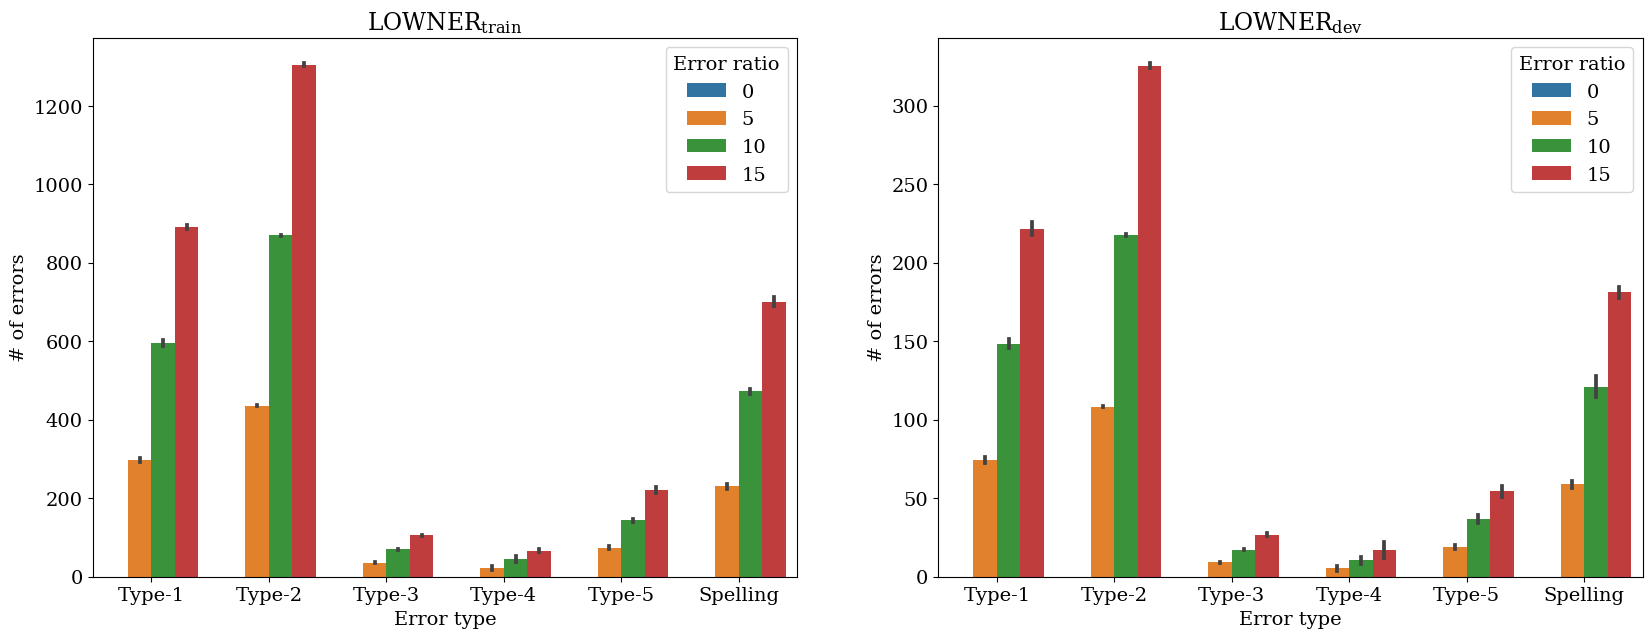

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, sharex=True, figsize=(20, 7))
sns.barplot(flattened_error_dist_df[flattened_error_dist_df["dataset"] ==
                                    "lowner_train"],
            x="Error type",
            y="# of errors",
            hue="Error ratio",
            order=[
                "Type-1",
                "Type-2",
                "Type-3",
                "Type-4",
                "Type-5",
                "Spelling",
            ],
            errorbar="sd",
            ax=axs[0])
axs[0].set_title("LOWNER$_{train}$")
sns.barplot(flattened_error_dist_df[flattened_error_dist_df["dataset"] ==
                                    "lowner_dev"],
            x="Error type",
            y="# of errors",
            hue="Error ratio",
            order=[
                "Type-1",
                "Type-2",
                "Type-3",
                "Type-4",
                "Type-5",
                "Spelling",
            ],
            errorbar="sd",
            ax=axs[1])
axs[1].set_title("LOWNER$_{dev}$")
LATEX_THESIS_PATH = "/home/loebbert/OneDrive/Studium/Master/Masterarbeit/Thesis"
os.makedirs(os.path.join(LATEX_THESIS_PATH, "drawings", "02_content"), exist_ok=True)
plt.savefig(os.path.join(LATEX_THESIS_PATH, "drawings", "02_content",
                         "dataset_error_distribution.png"),
            bbox_inches="tight",
            dpi=200)

# Gazetteer statistics
1. Statistics like in experiment 01 for each size + error rate
2. Error types distribution for each size + error rate

In [1]:
import sys
import os

thesis_path = "/" + os.path.join(*os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)

In [3]:
from itertools import product
from typing import Dict, List
from collections import defaultdict
from evaluations.datasets_00 import get_gazetteer_stats_df


labeled_data: Dict[str, List[str]] = defaultdict(list)
seeds = [1, 2, 3]
sizes = [2000, 4000, 6000, 8000]
error_ratios = [0, 5, 10, 15]
datapath = os.path.join(thesis_path, "experiments", "02_content", "data")
for seed, size, error_ratio in product(seeds, sizes, error_ratios):
    labeled_data_path = os.path.join(datapath, f"seed_{str(seed)}",
                                     "00_datasets", f"size_{size}",
                                     f"error_ratio_{error_ratio}")
    labeled_data[
        f"{seed}_{size}_{error_ratio}"] = [
            os.path.join(labeled_data_path, f"error_sampled_{gaz}.json")
            for gaz in ["lownergaz", "multiconer"]
        ]
gaz_stats_df = get_gazetteer_stats_df(labeled_data)
gaz_stats_df

,gazetteer,total samples,sample len avg,sample len std,total entities,distinct entities,entity count avg,entity count std,product,corporation,person,creative-work,group,location
0,1_2000_0,58662,3.626726,4.622386,62139,52947,1.059272,0.336363,6819,7034,13768,13516,8536,12466
1,1_2000_5,59383,3.582423,4.564708,60706,52291,1.022279,0.379928,6702,6728,13356,12878,8462,12580
2,1_2000_10,59373,3.629646,4.620203,58628,50940,0.987452,0.426021,6457,6568,13092,12519,8297,11695
3,1_2000_15,58987,3.627342,4.644958,56321,49181,0.954804,0.475335,6282,6474,12534,11839,7791,11401
4,1_4000_0,108051,3.751895,4.731746,114697,97211,1.061508,0.341855,12281,12573,26516,24546,15795,22986
5,1_4000_5,108484,3.771395,4.778985,111382,95413,1.026714,0.393978,12021,12472,25537,23835,15225,22292
6,1_4000_10,108682,3.754292,4.745672,108005,93158,0.993771,0.443708,11652,11899,25075,22898,14846,21635
7,1_4000_15,108725,3.747243,4.742074,104205,90634,0.958427,0.474140,11360,11748,23950,21854,14440,20853
8,1_6000_0,153446,3.858856,4.858746,163248,137429,1.063879,0.345718,17204,17784,38481,34857,22188,32734
9,1_6000_5,153284,3.852881,4.832583,157883,134315,1.030003,0.401154,16764,17392,36925,33402,21880,31520


In [4]:
def get_seed(name: str):
    return int(name.split("_")[0])


def get_size(name: str):
    return int(name.split("_")[1])


def get_error_ratio(name: str):
    return int(name.split("_")[2])



gaz_stats_df["seed"] = gaz_stats_df["gazetteer"].apply(get_seed)
gaz_stats_df["gazetteer_size"] = gaz_stats_df["gazetteer"].apply(
    get_size)
gaz_stats_df["error_ratio"] = gaz_stats_df["gazetteer"].apply(
    get_error_ratio)
gaz_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gazetteer          48 non-null     object 
 1   total samples      48 non-null     int64  
 2   sample len avg     48 non-null     float64
 3   sample len std     48 non-null     float64
 4   total entities     48 non-null     int64  
 5   distinct entities  48 non-null     int64  
 6   entity count avg   48 non-null     float64
 7   entity count std   48 non-null     float64
 8   product            48 non-null     int64  
 9   corporation        48 non-null     int64  
 10  person             48 non-null     int64  
 11  creative-work      48 non-null     int64  
 12  group              48 non-null     int64  
 13  location           48 non-null     int64  
 14  seed               48 non-null     int64  
 15  gazetteer_size     48 non-null     int64  
 16  error_ratio        48 non-nu

In [10]:
agg_gaz_stats = gaz_stats_df.pivot_table(
    values=[
        "total samples", "sample len avg", "sample len std", "total entities",
        "entity count avg", "entity count std", "distinct entities"
    ],
    index=["gazetteer_size", "error_ratio"],
    aggfunc=["mean", "std"]).swaplevel(0, 1, axis=1).sort_index(axis=1)
agg_gaz_stats

distinct entities  ... total samples
                                        mean  ...           std
gazetteer_size error_ratio                    ...              
2000           0                53094.666667  ...    251.279393
               5                52178.666667  ...    401.211083
               10               50896.000000  ...    123.386925
               15               49364.333333  ...    255.969399
4000           0                97254.666667  ...    807.626770
               5                95165.000000  ...    171.717792
               10               93200.666667  ...    225.319773
               15               90550.333333  ...    284.846157
6000           0               137474.000000  ...    381.555151
               5               134277.666667  ...    804.527398
               10              130972.333333  ...    424.823493
               15              127667.666667  ...    411.077041
8000           0               174291.000000  ...    487.038328
               5               169723.000000  ...    974.843064
               10              165460.000000  ...    491.069242
               15              161456.666667  ...    811.490809

[16 rows x 14 columns]

In [13]:
from evaluations.utils import LATEX_DATASET_NAMES, DATASET_ORDER, merge_mean_std
import pandas as pd


agg_gaz_stats[("Entry length", "")] = merge_mean_std(agg_gaz_stats,
                                                   ("sample len avg", "mean"),
                                                   ("sample len std", "mean"))
agg_gaz_stats[("Entity count", "")] = merge_mean_std(agg_gaz_stats,
                                               ("entity count avg", "mean"),
                                               ("entity count std", "mean"))
agg_gaz_stats[("Distinct entities",
               "")] = merge_mean_std(agg_gaz_stats,
                                     ("distinct entities", "mean"),
                                     ("distinct entities", "std"), precision=0)
agg_gaz_stats[("Total entries",
               "")] = merge_mean_std(agg_gaz_stats, ("total samples", "mean"),
                                     ("total samples", "std"), precision=0)
agg_gaz_stats[("Total entities",
               "")] = merge_mean_std(agg_gaz_stats,
                                     ("total entities", "mean"),
                                     ("total entities", "std"), precision=0)


agg_gaz_stats.index.rename(["Gazetteer size", "Error ratio"], inplace=True)
print(agg_gaz_stats[[
    "Total entries", "Entry length", "Total entities", "Entity count",
    "Distinct entities"
]].style.to_latex(
    siunitx=True,
    hrules=True,
    multirow_align="t",
    column_format=
    "@{}llS[table-format = 6 (3)]S[table-format = 1.2 (2)]S[table-format = 6 (3)]S[table-format = 1.2 (2)]S[table-format = 6 (0)]@{}"
))

\begin{tabular}{@{}llS[table-format = 6 (3)]S[table-format = 1.2 (2)]S[table-format = 6 (3)]S[table-format = 1.2 (2)]S[table-format = 6 (0)]@{}}
\toprule
{} & {} & {Total entries} & {Entry length} & {Total entities} & {Entity count} & {Distinct entities} \\
{} & {} & {} & {} & {} & {} & {} \\
{Gazetteer size} & {Error ratio} & {} & {} & {} & {} & {} \\
\midrule
\multirow[t]{4}{*}{2000} & 0 & 58,871 (251) & 3.62 (462) & 62,261 (197) & 1.06 (33) & 53,095 (225) \\
 & 5 & 59,277 (401) & 3.60 (460) & 60,617 (391) & 1.02 (38) & 52,179 (475) \\
 & 10 & 59,307 (123) & 3.61 (461) & 58,616 (129) & 0.99 (43) & 50,896 (150) \\
 & 15 & 59,071 (256) & 3.62 (462) & 56,379 (186) & 0.95 (47) & 49,364 (210) \\
\multirow[t]{4}{*}{4000} & 0 & 108,212 (808) & 3.76 (475) & 114,822 (847) & 1.06 (34) & 97,255 (653) \\
 & 5 & 108,366 (172) & 3.77 (477) & 111,368 (148) & 1.03 (40) & 95,165 (230) \\
 & 10 & 108,889 (225) & 3.76 (475) & 108,167 (258) & 0.99 (44) & 93,201 (150) \\
 & 15 & 108,572 (285) & 3.76 (476

## Gaz stats per entity type

In [14]:
from evaluations.utils import ENTITY_NAMES

agg_gaz_stats = gaz_stats_df.pivot_table(
    values=[*ENTITY_NAMES.keys()],
    index=["gazetteer_size", "error_ratio"],
    aggfunc=["mean", "std"]).swaplevel(0, 1, axis=1).sort_index(axis=1)
agg_gaz_stats

corporation              ...       product            
                                    mean         std  ...          mean         std
gazetteer_size error_ratio                            ...                          
2000           0             6907.000000  110.313191  ...   6744.000000   65.383484
               5             6765.000000   32.046841  ...   6599.666667  106.744243
               10            6589.000000   24.556058  ...   6444.666667   39.954140
               15            6387.000000   75.478474  ...   6298.000000  104.919016
4000           0            12629.666667   51.316014  ...  12178.000000  182.748461
               5            12336.666667  119.249039  ...  11823.333333  179.053996
               10           11927.666667   95.290783  ...  11631.000000   76.687678
               15           11676.000000   64.899923  ...  11284.666667   65.858434
6000           0            17753.000000   98.239503  ...  17134.666667  127.962234
               5            17391.666667  139.500299  ...  16648.666667  109.143636
               10           16809.000000  164.070107  ...  16226.666667  156.835370
               15           16478.333333  194.775084  ...  15861.666667   92.045279
8000           0            22412.666667  173.727756  ...  21466.000000  196.695196
               5            21909.666667  117.937837  ...  21000.666667   35.019042
               10           21285.333333  129.793426  ...  20516.000000   91.065910
               15           20884.333333   82.863341  ...  19991.666667  166.674333

[16 rows x 12 columns]

In [16]:
from evaluations.utils import LATEX_DATASET_NAMES, DATASET_ORDER, merge_mean_std
import pandas as pd


for entity_type, entity_name in ENTITY_NAMES.items():
    agg_gaz_stats[entity_name] = merge_mean_std(agg_gaz_stats,
                                                (entity_type, "mean"),
                                                (entity_type, "std"),
                                                precision=0)

agg_gaz_stats.index.rename(["Gazetteer size", "Error ratio"], inplace=True)
print(agg_gaz_stats[[*ENTITY_NAMES.values()]].style.to_latex(
    siunitx=True,
    hrules=True,
    multirow_align="t",
    column_format="@{}ll*6{S[table-format = 5 (0)]}@{}"))


\begin{tabular}{@{}ll*6{S[table-format = 5 (0)]}@{}}
\toprule
{} & {} & {Person} & {Location} & {Group} & {Corporation} & {Creative Work} & {Product} \\
{} & {} & {} & {} & {} & {} & {} & {} \\
{Gazetteer size} & {Error ratio} & {} & {} & {} & {} & {} & {} \\
\midrule
\multirow[t]{4}{*}{2000} & 0 & 13,925 (289) & 12,537 (560) & 8,654 (158) & 6,907 (110) & 13,494 (23) & 6,744 (65) \\
 & 5 & 13,380 (81) & 12,347 (490) & 8,521 (116) & 6,765 (32) & 13,004 (125) & 6,600 (107) \\
 & 10 & 13,072 (108) & 11,757 (404) & 8,262 (158) & 6,589 (25) & 12,491 (40) & 6,445 (40) \\
 & 15 & 12,419 (226) & 11,410 (288) & 7,918 (160) & 6,387 (75) & 11,947 (139) & 6,298 (105) \\
\multirow[t]{4}{*}{4000} & 0 & 26,342 (152) & 23,152 (860) & 15,968 (288) & 12,630 (51) & 24,553 (81) & 12,178 (183) \\
 & 5 & 25,574 (39) & 22,386 (660) & 15,497 (482) & 12,337 (119) & 23,751 (80) & 11,823 (179) \\
 & 10 & 24,699 (349) & 21,865 (693) & 15,034 (425) & 11,928 (95) & 23,010 (132) & 11,631 (77) \\
 & 15 & 23,760 (189)

## Error distribution gazetteers

In [19]:
from models.metrics import ASPMetrics
from typing import List, Tuple, Dict
import json
import pandas as pd
from tqdm import tqdm


def get_augmentation_errors(aug_dataset: List[dict], dataset: List[dict]):
    assert len(aug_dataset) == len(dataset)
    metrics = ASPMetrics()
    spelling_errors = 0
    tokens = 0
    total_entities = 0
    total_aug_entities = 0

    def to_prediction(entities: List[dict]):
        return [(ent["start"], ent["end"], ent["type"]) for ent in entities]

    for aug_sample, sample in zip(aug_dataset, dataset):
        assert aug_sample["doc_id"] == sample["doc_id"]
        total_entities += len(sample["entities"])
        total_aug_entities += len(aug_sample["entities"])
        metrics.update(sample["doc_id"], to_prediction(aug_sample["entities"]),
                       to_prediction(sample["entities"]))
        for token_idx in range(len(sample["tokens"])):
            if aug_sample["tokens"][token_idx] != sample["tokens"][token_idx]:
                spelling_errors += 1
        tokens += len(sample["tokens"])

    errors = metrics.errors()
    return {
        "spelling_errors": spelling_errors,
        "error_type1": errors[0],
        "error_type2": errors[1],
        "error_type3": errors[2],
        "error_type4": errors[3],
        "error_type5": errors[4],
    }


labeled_data: Dict[str, List[str]] = defaultdict(list)
seeds = [1, 2, 3]
sizes = [2000, 4000, 6000, 8000]
error_ratios = [0, 5, 10, 15]
datapath = os.path.join(thesis_path, "experiments", "02_content", "data")
error_dists = []
for seed, size, error_ratio in tqdm(list(product(seeds, sizes, error_ratios))):
    labeled_data_path = os.path.join(datapath, f"seed_{str(seed)}",
                                     "00_datasets", f"size_{size}",
                                     f"error_ratio_{error_ratio}")
    error_gaz = []
    for filepath in [
        os.path.join(labeled_data_path, f"error_sampled_{gaz}.json")
        for gaz in ["lownergaz", "multiconer"]
    ]:
        with open(os.path.join(filepath),
                "r") as file:
            error_gaz.extend(json.load(file))
    baseline_gaz = []
    for filepath in [
            os.path.join(labeled_data_path, f"clean_sampled_{gaz}.json")
            for gaz in ["lownergaz", "multiconer"]
    ]:
        with open(os.path.join(filepath), "r") as file:
            baseline_gaz.extend(json.load(file))
    error_dists.append({
        "seed": seed,
        "gazetteer_size": size,
        "error_ratio": error_ratio,
        **get_augmentation_errors(error_gaz, baseline_gaz)
    })
error_dist_df = pd.DataFrame.from_records(error_dists)
error_dist_df

100%|██████████| 48/48 [05:25<00:00,  6.78s/it]


,seed,gazetteer_size,error_ratio,spelling_errors,error_type1,error_type2,error_type3,error_type4,error_type5
0,1,2000,0,0,0,0,0,0,0
1,1,2000,5,853,198,2265,225,39,61
2,1,2000,10,1706,390,4524,450,83,118
3,1,2000,15,2504,604,6749,665,110,180
4,1,4000,0,0,0,0,0,0,0
5,1,4000,5,1564,395,4123,408,75,122
6,1,4000,10,3115,797,8268,817,148,233
7,1,4000,15,4639,1173,12391,1217,235,361
8,1,6000,0,0,0,0,0,0,0
9,1,6000,5,2222,601,5813,574,99,183


In [20]:
flattened_error_dist_df = error_dist_df.set_index(
    ["seed", "gazetteer_size", "error_ratio"]).stack()
flattened_error_dist_df.index.rename(
    ["seed", "gazetteer_size", "error_ratio", "metric"],
    inplace=True)
flattened_error_dist_df.name = "# of errors"
metric_names = {
    'spelling_errors': "Spelling",
    'error_type1': "Type-1",
    'error_type2': "Type-2",
    'error_type3': "Type-3",
    'error_type4': "Type-4",
    'error_type5': "Type-5"
}

flattened_error_dist_df = flattened_error_dist_df.reset_index().rename(
    {
        "gazetteer_size": "Gazetteer size",
        "error_ratio": "Error ratio",
        "metric": "Error type"
    }, axis=1)
flattened_error_dist_df["Error type"] = flattened_error_dist_df[
    "Error type"].map(metric_names)
flattened_error_dist_df

,seed,Gazetteer size,Error ratio,Error type,# of errors
0,1,2000,0,Spelling,0
1,1,2000,0,Type-1,0
2,1,2000,0,Type-2,0
3,1,2000,0,Type-3,0
4,1,2000,0,Type-4,0
...,...,...,...,...,...
283,3,8000,15,Type-1,2369
284,3,8000,15,Type-2,22211
285,3,8000,15,Type-3,2185
286,3,8000,15,Type-4,444


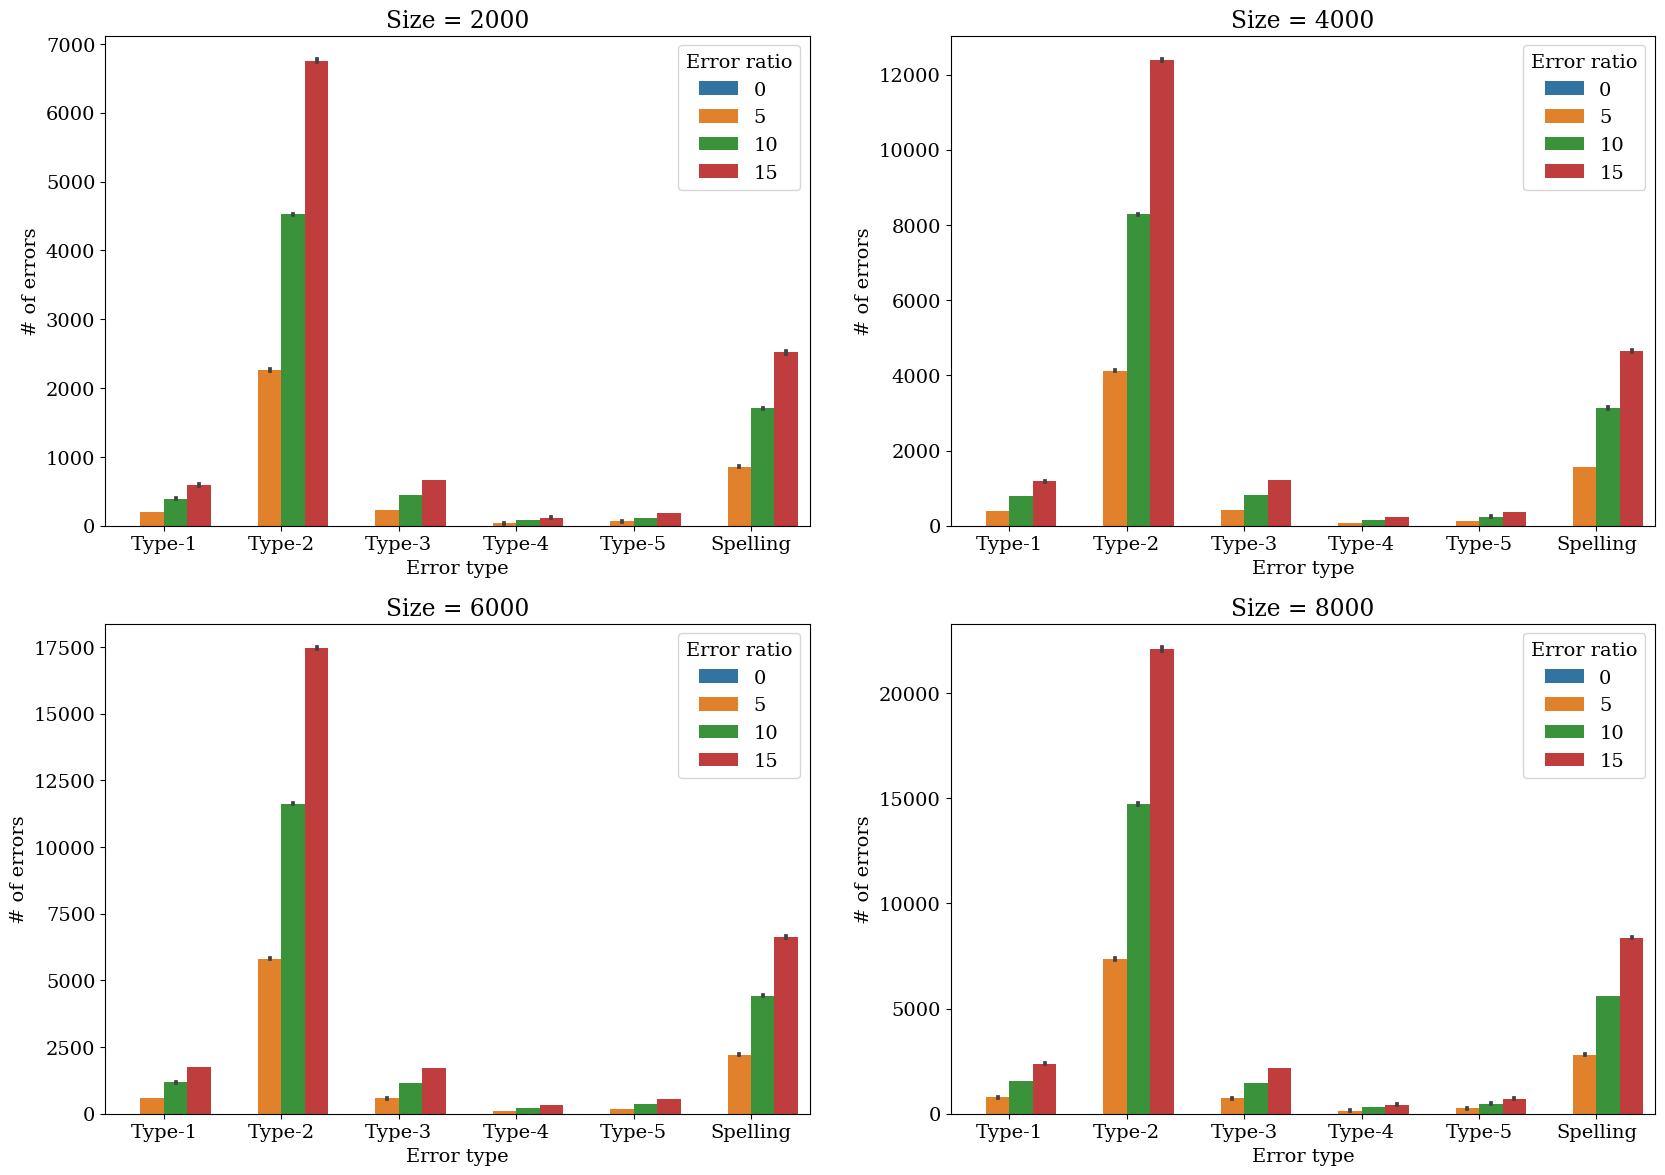

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(20, 14))
axs_idx = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1),
]
for idx, size in enumerate(sizes):
    sns.barplot(flattened_error_dist_df[
        flattened_error_dist_df["Gazetteer size"] == size],
                x="Error type",
                y="# of errors",
                hue="Error ratio",
                order=[
                    "Type-1",
                    "Type-2",
                    "Type-3",
                    "Type-4",
                    "Type-5",
                    "Spelling",
                ],
                errorbar="sd",
                ax=axs[axs_idx[idx]])
    axs[axs_idx[idx]].set_title(f"Size = {size}")

LATEX_THESIS_PATH = "/home/loebbert/OneDrive/Studium/Master/Masterarbeit/Thesis"
os.makedirs(os.path.join(LATEX_THESIS_PATH, "drawings", "02_content"),
            exist_ok=True)
plt.savefig(os.path.join(LATEX_THESIS_PATH, "drawings", "02_content",
                         "gazetteer_error_distribution.png"),
            bbox_inches="tight",
            dpi=200)